<a href="https://colab.research.google.com/github/A01793101-GMuniz/ProyectoIntegrador/blob/main/Avance2_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Construccion
Se demuestra un profundo conocimiento del dominio, al crear características nuevas y significativas (si aplica). Se codifican las variables categóricas empleando las técnicas adecuadas. Se justifica cada decisión de procesamiento.


In [1]:
import pandas as pd
import numpy as np


db_Bipolar = 'BasededatosBipolaresMTYMapped.csv'


df = pd.read_csv(db_Bipolar)

df.head()

,Family_ID,Proband_Relation,Age,Gender,Marital_Status,School_Years,Religion,Employment,Psychiatric_Diagnosis_DIGS,Psychosis_DIGS,D+AH1epression_DIGS,Anxiety_DIGS,Bipolar_DIGS,Eating_Disorders_DIGS,Alcohol_Abuse/Dependence_DIGS,Drugs_Abuse/Dependence_DIGS,Behaviour_Disorders,Personality_Disorders
0,100,Mother,72,Female,Married,Technical_studies,Catholic,Yes,No Pathology,No Pathology,No Pathology,No Pathology,No Pathology,No Pathology,No Pathology,No Pathology,No Pathology,No Pathology
1,100,Father,77,Male,Married,College,Catholic,Yes,Depresion Mayor,No Pathology,Yes,No Pathology,No Pathology,No Pathology,No Pathology,No Pathology,No Pathology,No Pathology
2,100,Proband,36,Male,Single,Technical_studies,No Religion,Yes,BPI,No Pathology,No Pathology,No Pathology,Yes,No Pathology,No Pathology,No Pathology,No Pathology,No Pathology
3,101,Mother,68,Female,Married,High_school,Catholic,No,Depresion Mayor,No Pathology,Yes,No Pathology,No Pathology,No Pathology,No Pathology,No Pathology,No Pathology,No Pathology
4,101,Father,56,Male,Married,College,Catholic,Yes,No Pathology,No Pathology,No Pathology,No Pathology,No Pathology,No Pathology,No Pathology,No Pathology,No Pathology,No Pathology


In [2]:
# Descripcion general de los datos
print("Descripción general de la forma y los tipos de datos:")
print(df.info())
print(f"Shape del conjunto de datos:{df.shape}")

Descripción general de la forma y los tipos de datos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421 entries, 0 to 420
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Family_ID                      421 non-null    int64 
 1   Proband_Relation               421 non-null    object
 2   Age                            421 non-null    int64 
 3   Gender                         421 non-null    object
 4   Marital_Status                 421 non-null    object
 5   School_Years                   421 non-null    object
 6   Religion                       421 non-null    object
 7   Employment                     421 non-null    object
 8   Psychiatric_Diagnosis_DIGS     421 non-null    object
 9   Psychosis_DIGS                 421 non-null    object
 10  D+AH1epression_DIGS            421 non-null    object
 11  Anxiety_DIGS                   421 non-null    object
 12  Bipolar_DI

## CODIFICAR VARIABLES CATEGORICAS

Para trabajar con los metodos mencionados es necesario convertir nuestras variables categoricas en representaciones numericas antes de calcular las correlaciones.

Usaremos 2 tecnicas comunes para analizar nuestros datos y determinar cual es el metodo mas adecuado para nuestro caso de estudio:


1.   One Hot Encoding
2.   Label Encoding


In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Hacemos una copia de los datos sin valores faltantes o nulos
df_copia = df.copy()
df_copia.head()

,Family_ID,Proband_Relation,Age,Gender,Marital_Status,School_Years,Religion,Employment,Psychiatric_Diagnosis_DIGS,Psychosis_DIGS,D+AH1epression_DIGS,Anxiety_DIGS,Bipolar_DIGS,Eating_Disorders_DIGS,Alcohol_Abuse/Dependence_DIGS,Drugs_Abuse/Dependence_DIGS,Behaviour_Disorders,Personality_Disorders
0,100,Mother,72,Female,Married,Technical_studies,Catholic,Yes,No Pathology,No Pathology,No Pathology,No Pathology,No Pathology,No Pathology,No Pathology,No Pathology,No Pathology,No Pathology
1,100,Father,77,Male,Married,College,Catholic,Yes,Depresion Mayor,No Pathology,Yes,No Pathology,No Pathology,No Pathology,No Pathology,No Pathology,No Pathology,No Pathology
2,100,Proband,36,Male,Single,Technical_studies,No Religion,Yes,BPI,No Pathology,No Pathology,No Pathology,Yes,No Pathology,No Pathology,No Pathology,No Pathology,No Pathology
3,101,Mother,68,Female,Married,High_school,Catholic,No,Depresion Mayor,No Pathology,Yes,No Pathology,No Pathology,No Pathology,No Pathology,No Pathology,No Pathology,No Pathology
4,101,Father,56,Male,Married,College,Catholic,Yes,No Pathology,No Pathology,No Pathology,No Pathology,No Pathology,No Pathology,No Pathology,No Pathology,No Pathology,No Pathology


In [6]:
# Definimos las columnas categoricas
columnas_categoricas = df_copia.select_dtypes(exclude=np.number).columns.tolist()
columnas_categoricas

['Proband_Relation',
 'Gender',
 'Marital_Status',
 'School_Years',
 'Religion',
 'Employment',
 'Psychiatric_Diagnosis_DIGS',
 'Psychosis_DIGS',
 'D+AH1epression_DIGS',
 'Anxiety_DIGS',
 'Bipolar_DIGS',
 'Eating_Disorders_DIGS',
 'Alcohol_Abuse/Dependence_DIGS',
 'Drugs_Abuse/Dependence_DIGS',
 'Behaviour_Disorders',
 'Personality_Disorders']

Existen tipos de variables categoricas, para llevar a cabo nuestro analisis es necesario definir cuales son estos.

Existen las variables categoricas de naturaleza ordinal, las cuales son variables categóricas que tienen un orden inherente. Por ejemplo, si existe una columna "Grado de estudios", donde existe un orden claro de menor a mayor nivel educativo.

Asi mismo tambien existen variables categóricas de naturaleza nominal las cuales son variables categóricas que no tienen un orden inherente. Por ejemplo, si existe una columna "Empleo" donde podemos deducir que no existe un orden específico entre los diferentes empleos que se encuentren en el conjunto de datos.

In [7]:
# Definimos las columnas ordinales
columnas_ordinales = ['Marital_Status', 'School_Years']
print(columnas_ordinales)

# Creamos una lista de columnas nominales
columnas_nominales = [columna for columna in columnas_categoricas if columna not in columnas_ordinales]
columnas_nominales.remove("Psychiatric_Diagnosis_DIGS")
print(columnas_nominales)

['Marital_Status', 'School_Years']
['Proband_Relation', 'Gender', 'Religion', 'Employment', 'Psychosis_DIGS', 'D+AH1epression_DIGS', 'Anxiety_DIGS', 'Bipolar_DIGS', 'Eating_Disorders_DIGS', 'Alcohol_Abuse/Dependence_DIGS', 'Drugs_Abuse/Dependence_DIGS', 'Behaviour_Disorders', 'Personality_Disorders']


Asi pues, One Hot Encoding se utilizara para nuestras variables categóricas nominales, mientras que Label Encoding se utiliza en las variables categóricas ordinales.

### Varriables Categoricas Nominales (One Hot Encoding)

In [8]:
from sklearn.preprocessing import OneHotEncoder

# Crear one-hot encoding para las variables categóricas
one_hot_df = df_copia.copy()
# Remove Psychiatric_Diagnosis_DIGS
one_hot_df.drop(columns=['Psychiatric_Diagnosis_DIGS'], inplace=True)
# Quitar las columnas nominales de one_hot_df
one_hot_df.drop(columns=columnas_nominales, inplace=True)

# Inicializar el codificador OneHotEncoder
one_hot_encoder = OneHotEncoder(sparse=False, drop='first')
# Ajustar y transformar las columnas nominales usando multi_df
nominales_encoded = one_hot_encoder.fit_transform(df_copia[columnas_nominales])
# Obtener los nombres de las nuevas columnas generadas por el codificador
nuevas_columnas = one_hot_encoder.get_feature_names_out(columnas_nominales)

# Convertir los valores codificados a enteros
nominales_encoded_int = nominales_encoded.astype(int)

# Crear un nuevo DataFrame con las columnas codificadas
one_hot_encoded_df = pd.DataFrame(nominales_encoded_int, columns=nuevas_columnas)
one_hot_encoded_df = one_hot_encoded_df.astype(int)

# Resetear los índices para asegurar una alineación adecuada antes de hacer merge
one_hot_df.reset_index(drop=True, inplace=True)
one_hot_encoded_df.reset_index(drop=True, inplace=True)

# Concatenar el DataFrame codificado con las columnas del DataFrame original que no son nominales

one_hot_df = pd.merge(one_hot_df, one_hot_encoded_df, left_index=True, right_index=True, how='inner')
one_hot_df.head()

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Family_ID,Age,Marital_Status,School_Years,Proband_Relation_Brother,Proband_Relation_Cousin_Female,Proband_Relation_Cousin_Male,Proband_Relation_Daughter,Proband_Relation_Father,Proband_Relation_Mother,...,Employment_Yes,Psychosis_DIGS_Yes,D+AH1epression_DIGS_Yes,Anxiety_DIGS_Yes,Bipolar_DIGS_Yes,Eating_Disorders_DIGS_Yes,Alcohol_Abuse/Dependence_DIGS_Yes,Drugs_Abuse/Dependence_DIGS_Yes,Behaviour_Disorders_Yes,Personality_Disorders_Yes
0,100,72,Married,Technical_studies,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
1,100,77,Married,College,0,0,0,0,1,0,...,1,0,1,0,0,0,0,0,0,0
2,100,36,Single,Technical_studies,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
3,101,68,Married,High_school,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
4,101,56,Married,College,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0


In [9]:
# Imprimimos la forma resultante y validamos que no existe algun valor nulo
print(one_hot_df.shape)
one_hot_df[one_hot_df.isnull().any(axis=1)]

(421, 29)


,Family_ID,Age,Marital_Status,School_Years,Proband_Relation_Brother,Proband_Relation_Cousin_Female,Proband_Relation_Cousin_Male,Proband_Relation_Daughter,Proband_Relation_Father,Proband_Relation_Mother,...,Employment_Yes,Psychosis_DIGS_Yes,D+AH1epression_DIGS_Yes,Anxiety_DIGS_Yes,Bipolar_DIGS_Yes,Eating_Disorders_DIGS_Yes,Alcohol_Abuse/Dependence_DIGS_Yes,Drugs_Abuse/Dependence_DIGS_Yes,Behaviour_Disorders_Yes,Personality_Disorders_Yes


### Variables Categoricas Ordinales (Label Encoder)

In [10]:
from sklearn.preprocessing import LabelEncoder

# Creamos un DataFrame encoded_df para almacenar las transformaciones, este sera
# nuestro dataframe final.
encoded_df = one_hot_df.copy()
# Quitamos las columnas ordinales del df que ya se aplico transformacion one hot
one_hot_df.drop(columns=columnas_ordinales, inplace=True)

# Inicializamos el LabelEncoder
label_encoder = LabelEncoder()

# Aplicamos la transformacion a las columnas ordinales usando LabelEncoder
for col in columnas_ordinales:
  encoded_df[col] = label_encoder.fit_transform(encoded_df[col])

# Tenemos que hacer un reset a los índices para asegurar una alineación adecuada antes de hacer merge
encoded_df.reset_index(drop=True, inplace=True)

# Unimos el DataFrame codificado con las columnas del DataFrame original que no son ordinales
encoded_df = pd.concat([one_hot_df, encoded_df[columnas_ordinales]], axis=1)

encoded_df.head()


,Family_ID,Age,Proband_Relation_Brother,Proband_Relation_Cousin_Female,Proband_Relation_Cousin_Male,Proband_Relation_Daughter,Proband_Relation_Father,Proband_Relation_Mother,Proband_Relation_Nephew,Proband_Relation_Niece,...,D+AH1epression_DIGS_Yes,Anxiety_DIGS_Yes,Bipolar_DIGS_Yes,Eating_Disorders_DIGS_Yes,Alcohol_Abuse/Dependence_DIGS_Yes,Drugs_Abuse/Dependence_DIGS_Yes,Behaviour_Disorders_Yes,Personality_Disorders_Yes,Marital_Status,School_Years
0,100,72,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,5
1,100,77,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,100,36,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,3,5
3,101,68,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,2
4,101,56,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [11]:
# Imprimimos la forma resultante y validamos que no existe algun valor nulo
print(encoded_df.shape)
encoded_df[encoded_df.isnull().any(axis=1)]

(421, 29)


,Family_ID,Age,Proband_Relation_Brother,Proband_Relation_Cousin_Female,Proband_Relation_Cousin_Male,Proband_Relation_Daughter,Proband_Relation_Father,Proband_Relation_Mother,Proband_Relation_Nephew,Proband_Relation_Niece,...,D+AH1epression_DIGS_Yes,Anxiety_DIGS_Yes,Bipolar_DIGS_Yes,Eating_Disorders_DIGS_Yes,Alcohol_Abuse/Dependence_DIGS_Yes,Drugs_Abuse/Dependence_DIGS_Yes,Behaviour_Disorders_Yes,Personality_Disorders_Yes,Marital_Status,School_Years


In [12]:
# La forma final del conjunto de datos ya con las transformaciones realizadas
print(encoded_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421 entries, 0 to 420
Data columns (total 29 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Family_ID                          421 non-null    int64
 1   Age                                421 non-null    int64
 2   Proband_Relation_Brother           421 non-null    int64
 3   Proband_Relation_Cousin_Female     421 non-null    int64
 4   Proband_Relation_Cousin_Male       421 non-null    int64
 5   Proband_Relation_Daughter          421 non-null    int64
 6   Proband_Relation_Father            421 non-null    int64
 7   Proband_Relation_Mother            421 non-null    int64
 8   Proband_Relation_Nephew            421 non-null    int64
 9   Proband_Relation_Niece             421 non-null    int64
 10  Proband_Relation_Proband           421 non-null    int64
 11  Proband_Relation_Sister            421 non-null    int64
 12  Proband_Relation_Son  

### Matriz de Correlacion y Analisis PCA


In [13]:
import pandas as pd
from scipy.stats import spearmanr

# Creamos una funcion para graficar mapas de calor

def plot_heatmap(corr_matrix, method):
  plt.figure(figsize=(10, 8))
  sns.heatmap(corr_matrix, cmap='coolwarm', fmt=".2f")
  plt.title(f'Heatmap de la Matriz de Correlación usando metodo {method}')
  plt.show()

def get_correlation_matrix(df_encoded, method):
  # Calcular el coeficiente de correlación para cada par de columnas usando el
  # metodo seleccionado
  spearman_corr_matrix = df_encoded.corr(method=method)

  # Visualizar la matriz de correlación
  plot_heatmap(spearman_corr_matrix, method=method)

In [14]:
from sklearn.decomposition import PCA

def get_PCA(df_encoded):
    # Creamos la instancia de PCA
    pca = PCA()

    # Ajustamos el modelo PCA a los datos
    pca.fit(df_encoded)

    # Calcula la suma acumulativa de la proporción de varianza explicada por cada componente principal
    total_varianza_explicada = pca.explained_variance_ratio_.cumsum()

    # Determina el número de componentes principales necesarios para explicar el 90% de la varianza acumulada
    varianza_noventa = sum(total_varianza_explicada < 0.90) + 1

    # Imprime el número de componentes necesarios para explicar el 90% de la varianza acumulada
    print("Número de componentes para explicar el 90% de la varianza:", varianza_noventa)

    # Crea un DataFrame que resume las características de los componentes principales
    pcsSummary = pd.DataFrame({'Standard deviation': np.sqrt(pca.explained_variance_),
                               'Proportion of variance': pca.explained_variance_ratio_,
                               'Cumulative proportion': np.cumsum(pca.explained_variance_ratio_)
                               })
    pcsSummary = pcsSummary.transpose()
    pcsSummary = pcsSummary.round(4)

    # Creamos una lista de números enteros que representan los componentes principales
    PC_components = np.arange(varianza_noventa) + 1

    fig, ax = plt.subplots(figsize=(10, 7))

    # Creamos un gráfico de barras que muestra la proporción de varianza
    # explicada por cada componente principal
    _ = sns.barplot(x=PC_components,
                    y=pca.explained_variance_ratio_[:varianza_noventa],
                    color='b')

    # Agregamos una línea(scree) que muestra la proporción acumulativa de
    # varianza explicada por los componentes principales
    _ = sns.lineplot(x=PC_components - 1,
                     y=np.cumsum(pca.explained_variance_ratio_[:varianza_noventa]),
                     color='black',
                     linestyle='-',
                     linewidth=2,
                     marker='o',
                     markersize=8)

    plt.title('Scree Plot > 90% Varianza')
    plt.xlabel('N-th Componente Principal')
    plt.ylabel('Varianza Explicada')
    plt.ylim(0, 1)
    plt.show()

    # Creamos un DataFrame que contiene los vectores de componentes principales
    pca_Components_df = pd.DataFrame(pca.components_.transpose(),
                                     columns=pcsSummary.columns,
                                     index=df_encoded.columns
                                     )

    # Renombramos las columnas del DataFrame `pca_Components_df` con el prefijo 'PC'
    pca_Components_df.columns = ['PC' + str(i) for i in range(1, pca_Components_df.shape[1] + 1)]
    pca_Components_df = pca_Components_df.sort_values(by='PC1', ascending=False)
    return pca_Components_df.iloc[:, :varianza_noventa]


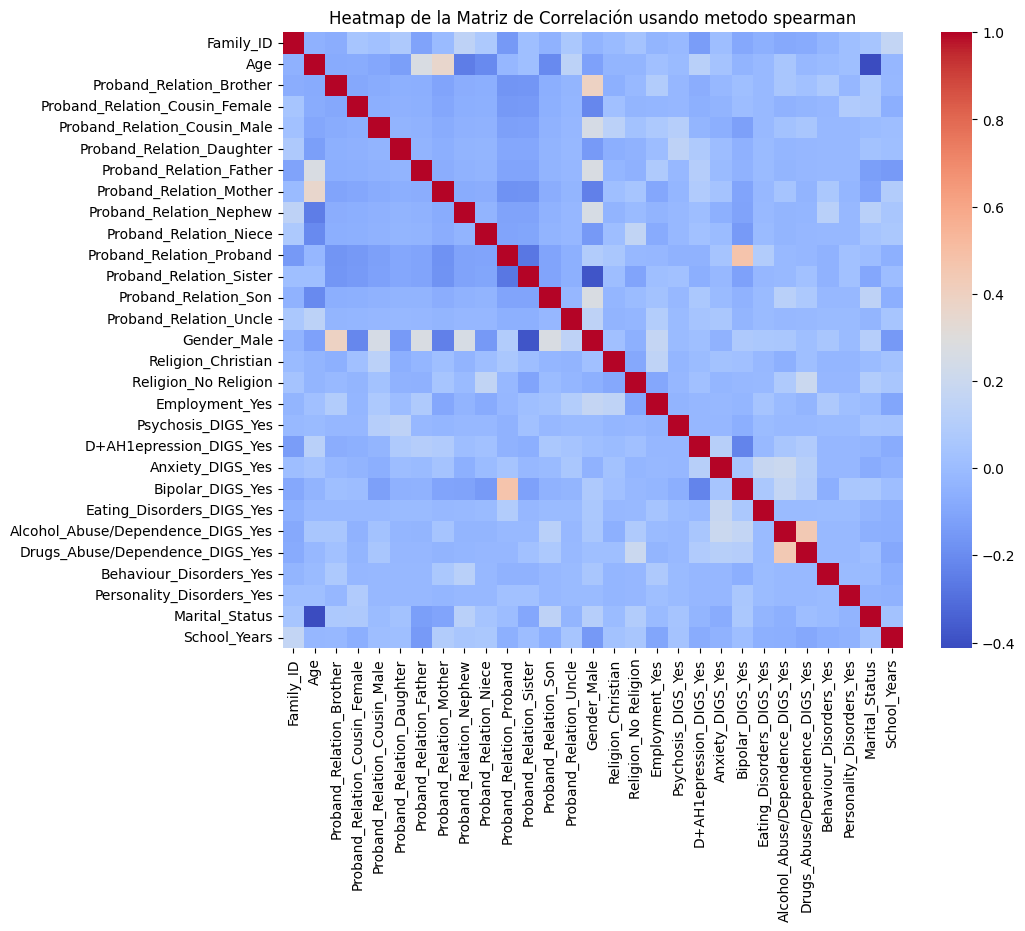

In [15]:
# Obtenemos la matriz de correlacion usando el metodo de spearman
get_correlation_matrix(encoded_df, "spearman")

Número de componentes para explicar el 90% de la varianza: 2


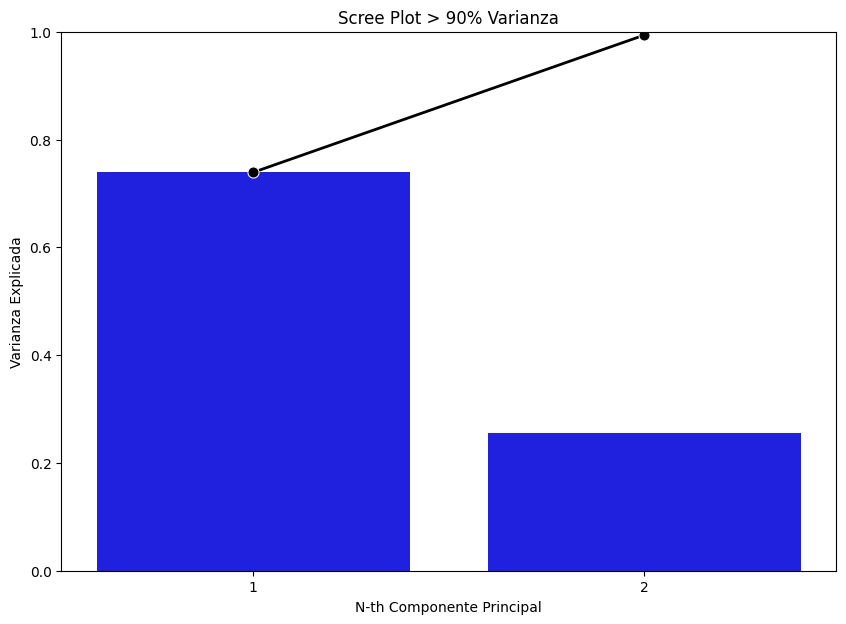

,PC1,PC2
Age,0.046512,0.998532
Proband_Relation_Proband,0.002431,-0.001433
Bipolar_DIGS_Yes,0.001615,-0.001807
D+AH1epression_DIGS_Yes,0.001403,0.002108
Proband_Relation_Father,0.000868,0.003779
Proband_Relation_Brother,0.000711,-0.001683
Employment_Yes,0.000634,-0.000384
Gender_Male,0.000618,-0.003375
Alcohol_Abuse/Dependence_DIGS_Yes,0.000505,0.000475
Drugs_Abuse/Dependence_DIGS_Yes,0.000380,-0.000205


In [17]:
# Realizamos el analisis PCA e imprimimos la importancia de cada feature en cada
# componente
components = get_PCA(encoded_df)
components.head(29)

### Creacion de conjunto de caracteristicas

Creemos que para contar con un modelo mas eficiente y de mayor complejidad y fiabilidad es necesario agrupar los datos actuales de acuerdo a grupos familiares.

Es por eso que se agruparan las familias en un data frame utilizando el Family_ID y las relaciones familiares como metodos de agrupacion.

In [20]:
# Eliminamos al probando/paciente del conjunto de datos.
df_sinproband = encoded_df[encoded_df['Proband_Relation_Proband'] != 1]
df_sinproband.reset_index()

,index,Family_ID,Age,Proband_Relation_Brother,Proband_Relation_Cousin_Female,Proband_Relation_Cousin_Male,Proband_Relation_Daughter,Proband_Relation_Father,Proband_Relation_Mother,Proband_Relation_Nephew,...,D+AH1epression_DIGS_Yes,Anxiety_DIGS_Yes,Bipolar_DIGS_Yes,Eating_Disorders_DIGS_Yes,Alcohol_Abuse/Dependence_DIGS_Yes,Drugs_Abuse/Dependence_DIGS_Yes,Behaviour_Disorders_Yes,Personality_Disorders_Yes,Marital_Status,School_Years
0,0,100,72,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,5
1,1,100,77,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
2,3,101,68,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,1,2
3,4,101,56,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4,6,101,25,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324,416,184,24,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
325,417,183,65,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,4,1
326,418,184,47,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
327,419,184,19,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,3,2


In [30]:
test_cols = [columna for columna in encoded_df.columns if '_Yes' in columna]

test_cols.extend([columna for columna in encoded_df if columna.startswith('Proband_Relation_') and not columna.endswith('Proband')])

test_cols

['Employment_Yes',
 'Psychosis_DIGS_Yes',
 'D+AH1epression_DIGS_Yes',
 'Anxiety_DIGS_Yes',
 'Bipolar_DIGS_Yes',
 'Eating_Disorders_DIGS_Yes',
 'Alcohol_Abuse/Dependence_DIGS_Yes',
 'Drugs_Abuse/Dependence_DIGS_Yes',
 'Behaviour_Disorders_Yes',
 'Personality_Disorders_Yes',
 'Proband_Relation_Brother',
 'Proband_Relation_Cousin_Female',
 'Proband_Relation_Cousin_Male',
 'Proband_Relation_Daughter',
 'Proband_Relation_Father',
 'Proband_Relation_Mother',
 'Proband_Relation_Nephew',
 'Proband_Relation_Niece',
 'Proband_Relation_Sister',
 'Proband_Relation_Son',
 'Proband_Relation_Uncle']

In [32]:
# Creamos otro conjunto adicional donde tendremos los datos del probando
# Exceptuando la informacion de los padecimientos psiquiatricos
df_proband = encoded_df[encoded_df['Proband_Relation_Proband'] == 1]
columnas_a_eliminar = [columna for columna in encoded_df.columns if '_Yes' in columna]
columnas_a_eliminar.extend([columna for columna in encoded_df if columna.startswith('Proband_Relation_') and not columna.endswith('Proband')])
df_proband.drop(columnas_a_eliminar, axis=1, inplace=True)
df_proband=df_proband.reset_index()
df_proband.head()

<ipython-input-32-3627c42af929>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_proband.drop(columnas_a_eliminar, axis=1, inplace=True)


,index,Family_ID,Age,Proband_Relation_Proband,Gender_Male,Religion_Christian,Religion_No Religion,Marital_Status,School_Years
0,2,100,36,1,1,0,1,3,5
1,5,101,28,1,0,0,0,3,0
2,8,102,41,1,0,0,0,1,5
3,10,103,29,1,1,0,0,3,0
4,13,104,36,1,0,0,0,1,2


In [34]:
# Agrupamos por Family_ID y Proband_Relation combinando los valores de cada columna
grouped_df = df_sinproband.groupby(['Family_ID', 'Proband_Relation_Proband']).agg(lambda x: x.tolist()).unstack()

# Reindexamos el DataFrame
grouped_df = grouped_df.reset_index()
grouped_df.columns = [f"{col[0]}_{col[1]}" if col[1] else col[0] for col in grouped_df.columns]

grouped_df.head(20)

,Family_ID,Age,Proband_Relation_Brother,Proband_Relation_Cousin_Female,Proband_Relation_Cousin_Male,Proband_Relation_Daughter,Proband_Relation_Father,Proband_Relation_Mother,Proband_Relation_Nephew,Proband_Relation_Niece,...,D+AH1epression_DIGS_Yes,Anxiety_DIGS_Yes,Bipolar_DIGS_Yes,Eating_Disorders_DIGS_Yes,Alcohol_Abuse/Dependence_DIGS_Yes,Drugs_Abuse/Dependence_DIGS_Yes,Behaviour_Disorders_Yes,Personality_Disorders_Yes,Marital_Status,School_Years
0,100,"[72, 77]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 1]","[1, 0]","[0, 0]","[0, 0]",...,"[0, 1]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[1, 1]","[5, 0]"
1,101,"[68, 56, 25, 21]","[0, 0, 1, 0]","[0, 0, 0, 0]","[0, 0, 0, 0]","[0, 0, 0, 0]","[0, 1, 0, 0]","[1, 0, 0, 0]","[0, 0, 0, 0]","[0, 0, 0, 0]",...,"[1, 0, 0, 0]","[0, 0, 0, 0]","[0, 0, 1, 0]","[0, 0, 0, 0]","[0, 0, 0, 0]","[0, 0, 0, 0]","[0, 0, 0, 0]","[0, 0, 0, 0]","[1, 1, 3, 3]","[2, 0, 2, 2]"
2,102,"[47, 66]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 1]","[0, 0]","[0, 0]",...,"[0, 1]","[0, 0]","[1, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 1]","[2, 5]"
3,103,[46],[0],[0],[0],[0],[0],[0],[0],[0],...,[0],[0],[0],[0],[0],[0],[0],[0],[1],[3]
4,104,"[66, 69, 39, 41, 43, 33]","[0, 0, 1, 0, 0, 0]","[0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0]","[0, 1, 0, 0, 0, 0]","[1, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0]",...,"[0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0]","[1, 1, 3, 1, 1, 1]","[5, 0, 2, 0, 0, 0]"
5,105,"[61, 69, 33, 23]","[0, 0, 0, 1]","[0, 0, 0, 0]","[0, 0, 0, 0]","[0, 0, 0, 0]","[0, 1, 0, 0]","[1, 0, 0, 0]","[0, 0, 0, 0]","[0, 0, 0, 0]",...,"[0, 1, 0, 0]","[0, 0, 0, 0]","[0, 0, 1, 0]","[0, 0, 0, 0]","[0, 0, 0, 0]","[0, 0, 0, 0]","[0, 0, 0, 0]","[0, 0, 0, 0]","[0, 0, 3, 3]","[0, 0, 0, 0]"
6,106,"[50, 59, 24, 28, 26]","[0, 0, 0, 1, 0]","[0, 0, 0, 0, 0]","[0, 0, 0, 0, 0]","[0, 0, 0, 0, 0]","[0, 1, 0, 0, 0]","[1, 0, 0, 0, 0]","[0, 0, 0, 0, 0]","[0, 0, 0, 0, 0]",...,"[0, 0, 0, 0, 0]","[0, 0, 0, 0, 0]","[0, 0, 0, 1, 0]","[0, 0, 0, 0, 0]","[0, 0, 0, 1, 0]","[0, 0, 0, 0, 0]","[0, 0, 0, 0, 0]","[0, 0, 0, 0, 1]","[1, 1, 1, 1, 3]","[2, 0, 0, 5, 0]"
7,107,"[65, 47, 46, 19, 36]","[0, 0, 0, 0, 1]","[0, 0, 0, 0, 0]","[0, 0, 0, 0, 0]","[0, 0, 0, 0, 0]","[0, 0, 0, 0, 0]","[1, 0, 0, 0, 0]","[0, 0, 0, 1, 0]","[0, 0, 0, 0, 0]",...,"[0, 0, 0, 0, 0]","[0, 0, 0, 0, 1]","[0, 0, 0, 0, 0]","[0, 0, 0, 0, 0]","[0, 0, 0, 0, 0]","[0, 0, 0, 0, 0]","[0, 0, 0, 0, 0]","[0, 0, 0, 0, 0]","[4, 1, 1, 3, 1]","[1, 0, 3, 2, 0]"
8,109,"[62, 41]","[0, 1]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]",...,"[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[1, 3]","[1, 0]"
9,110,[60],[0],[0],[0],[0],[0],[1],[0],[0],...,[1],[0],[0],[0],[0],[0],[0],[0],[0],[1]


# Normalización
Se escalan las variables para garantizar que todas tengan un impacto equitativo en el modelo y mejorar la convergencia de algunos algoritmos. Se aplican transformaciones comunes para lograr una distribución normal en algunas variables, si es necesario en el contexto y los objetivos de análisis. Se justifica cada técnica empleada.


# Selección / extracción
Se aplican métodos de filtrado y extracción, alineados a los resultados obtenidos de las pruebas efectuadas, para reducir la complejidad, acelerar el proceso de entrenamiento y facilitar la interpretación de los resultados.


# Conclusiones
Se incluye una conclusión general de la fase de Preparación de los datos en el contexto de la metodología CRISP-ML.
